# Project background and objectives

In this project, I am taking on the role of a social media analyst responsible for collecting, cleaning, and analysing data on a client's social media posts. My job is to use this analysis to communicate insights and make data-driven recommendations to help my client optimise their social media strategy and increase their reach and engagement.  


In [1]:
# Import the necessary libraries

import numpy as np 
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns


I am supposing that I've been asked to collect data relating to the number of likes on Facebook posts across different categories.

As this is a hypothetical client and I have no real data to work with, I need to generate some random data for the social media data I will be exploring and analysing later in the project. The data will consist of three features:

1. Date 
1. Category
1. Number of likes

The dataset will contain 1000 rows, each of which will be assigned a random date in the date range 01-01-2023 - 30-06-2024, a random category from a predefined list, and a random number of likes in the range 0-5000.


## Generating the data

In [2]:
# Here I define a list of categories

categories = ['Travel', 'Sport', 'Music', 'Family', 'Health', 'Film', 'Fashion', 'Food', 'Books', 'Comedy']

In [3]:
# Create data dictionary and populate with random data.

# Define the start and end dates
start_date = pd.to_datetime('2023-01-01')
end_date = pd.to_datetime('2024-01-01')

# Set the random seed for reproducibility
rng = np.random.default_rng(seed=42)

# Generate 1000 random dates within the range, one for each Facebook post. This method allows for multiple posts occurring on the same day.
num_tweets = 1000
random_dates = start_date + (end_date - start_date) * rng.random(num_tweets)

# Convert the numpy array of random dates to a pandas Series and format as YYYY-MM-DD
random_dates_formatted = pd.Series(random_dates).dt.strftime('%Y-%m-%d')

data = {
    'Date': random_dates_formatted,                                     # 1000 random dates within the given date range
    'Category': rng.choice(categories, size=num_tweets),                # randomly selects a category from the list for each of the 1000 rows
    'Likes': rng.integers(5000, size=num_tweets)                       # for each row, a random integer is selected in the range 0-5000 to represent number of likes
}

In [4]:
# The data can now be viewed and handled in a pandas dataframe

df = pd.DataFrame(data)

## Exploring the data

In [5]:
# Look at the first few rows of the dataframe

df.head()

,Date,Category,Likes
0,2023-10-10,Books,3890
1,2023-06-10,Travel,3359
2,2023-11-10,Family,4649
3,2023-09-12,Health,4802
4,2023-02-04,Food,3524


Here we can see the dataframe is made up of three columns. Date and Likes are continuous variables, while Category is, not surprisingly, a categorical variable.

In [6]:
# Print a summary of the dataframe.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      1000 non-null   object
 1   Category  1000 non-null   object
 2   Likes     1000 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


This summary shows that there are 3 columns and 1000 rows in the dataframe. It shows the datatype of each column and confirms that there are no missing values in any of the columns.

In [7]:
# Summary statistics for numerical columns - in this case, just the Likes column.

df.describe()

,Likes
count,1000.000000
mean,2505.172000
std,1430.058823
min,2.000000
25%,1207.750000
50%,2498.000000
75%,3745.250000
max,4996.000000


In [8]:
# Look at the number of posts belonging to each of the categories

df.Category.value_counts()

Category
Comedy     114
Sport      112
Family     110
Health     108
Food        96
Film        96
Books       95
Fashion     91
Travel      89
Music       89
Name: count, dtype: int64

In [9]:
# Check for duplicate rows
duplicate_rows = df.duplicated()

duplicate_rows.value_counts()

False    1000
Name: count, dtype: int64

## Cleaning the data

We have already established that there are no null values or duplicate rows in the dataset.

I will convert the Date column to datetime format to enable plotting.

In [10]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.normalize()
df.dtypes

Date        datetime64[ns]
Category            object
Likes                int64
dtype: object

## Visualizing the data

### Histogram of Likes

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


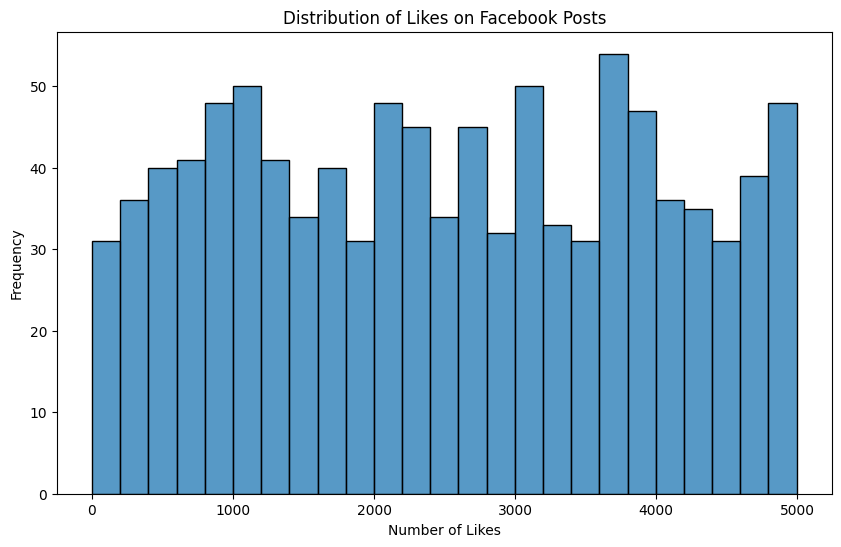

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Likes', bins=25)     
plt.xlabel('Number of Likes')
plt.ylabel('Frequency')
plt.title('Distribution of Likes on Facebook Posts')
plt.show()

The histogram shows that the grouping of 3600-3800 likes has the highest frequency, but it's difficult to draw any actionable conclusions from this plot. If I instead define thresholds for the performance of the posts (e.g. by binning them into categories for 'Poor', 'Good', and 'Excellent' performance based on number of Likes), it will be easier to see how much engagement the client generates with its posts. Furthermore, we can subdivide the bars to see how each subject is represented in each Likes category. 

### Histogram of Likes by Performance and Category (Poor, Good, and Excellent)

In [33]:
# Calculate percentiles for thresholds
poor_threshold = np.percentile(df['Likes'], 33)
excellent_threshold = np.percentile(df['Likes'], 66)

print(f'Poor threshold: {poor_threshold}')
print(f'Excellent threshold: {excellent_threshold}')


Poor threshold: 1653.0
Excellent threshold: 3286.0600000000004


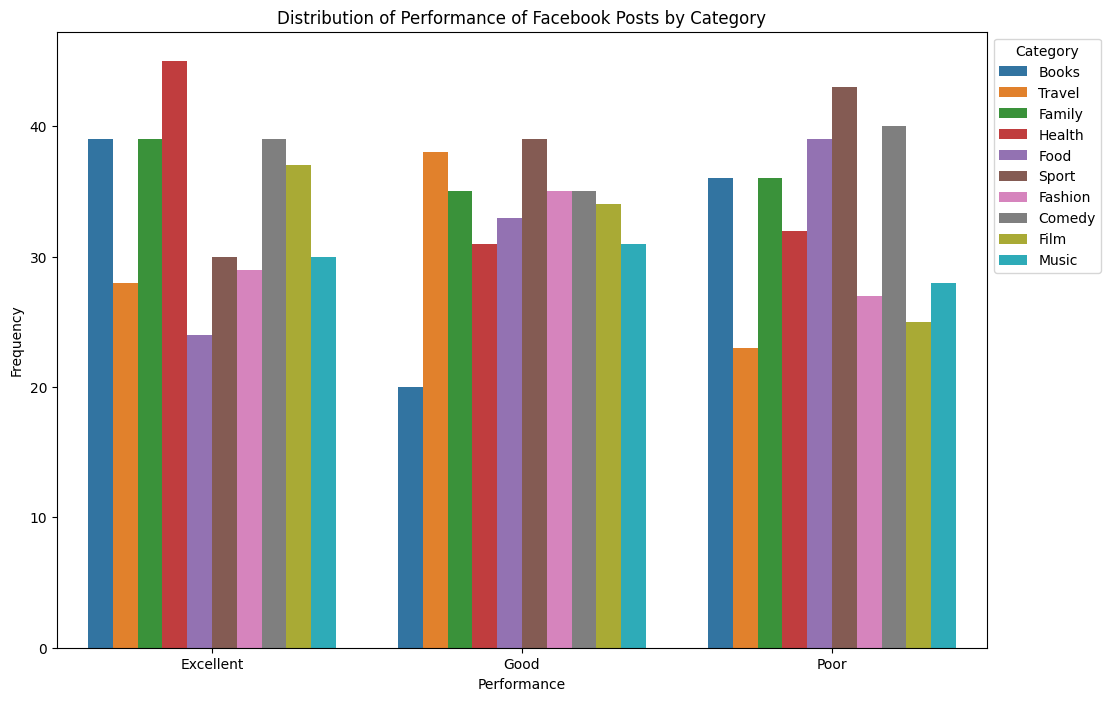

In [34]:
def categorize_performance(likes):
    if likes < low_threshold:
        return 'Poor'
    elif likes < high_threshold:
        return 'Good'
    else:
        return 'Excellent'

df['Performance'] = df['Likes'].apply(categorize_performance)


# Plotting the count plot to show distribution of likes categories
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Performance', hue='Category')
plt.xlabel('Performance')
plt.ylabel('Frequency')
plt.title('Distribution of Performance of Facebook Posts by Category')
plt.legend(title='Category', bbox_to_anchor=(1, 1))
plt.show()

Here we can see that Health generates the most posts in the 'High' likes category, followed by Books, Family, and Comedy.
Most of the posts in the Low likes category relate to Sport, with Comedy and Food also generating a high number of Low likes.
Comedy is well represented in both the High and Low categories; with a box plot we can examine the distribution of likes across each category in more detail.   

### Boxplot of Likes by Category

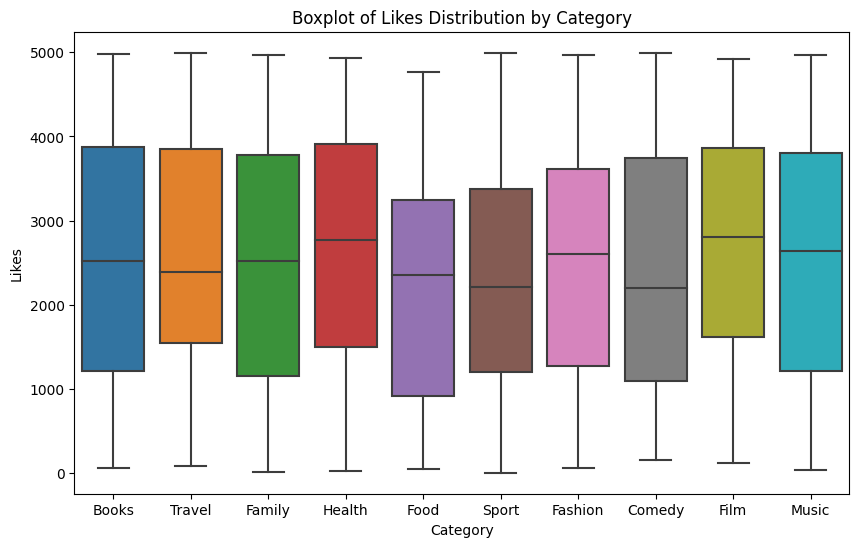

In [14]:
# Boxplot showing the distribution per category

plt.figure(figsize=(10, 6))

sns.boxplot(x="Category",
                y="Likes",
                data=df)


plt.title('Boxplot of Likes Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Likes')
plt.grid(False) 
plt.show()


The max and min values are very similar across all categories. The length of the box (which represents the interquartile range) looks to be smaller for Travel, Sport, and Film. Let's print out the exact values of the IQR for each category to see this in more detail:

In [17]:
# Calculate Q1 (25th percentile)
q1 = df.groupby('Category')['Likes'].quantile(0.25)

# Calculate Q3 (75th percentile)
q3 = df.groupby('Category')['Likes'].quantile(0.75)

# Combine Q1 and Q3 into a single dataframe for better readability
iqr_df = pd.DataFrame({'Q1': q1, 'Q3': q3})

# Calculate IQR
iqr_df['IQR'] = iqr_df['Q3'] - iqr_df['Q1']

iqr_df

,Q1,Q3,IQR
Category,,,
Books,1209.50,3874.00,2664.50
Comedy,1090.50,3742.75,2652.25
Family,1153.75,3775.00,2621.25
Fashion,1270.00,3612.50,2342.50
Film,1613.00,3863.50,2250.50
Food,914.75,3240.25,2325.50
Health,1493.00,3913.75,2420.75
Music,1208.00,3799.00,2591.00
Sport,1197.00,3378.00,2181.00


This confirms that the three smallest IQRs belong to Sport, Film, and Travel. A smaller IQR indicates that the central data are closer together for these three categories, so the data is more consistent, while the other categories show slightly more variability.   

Going back to the boxplot, we can see three categories (Travel, Sport, Comedy) where the median appears below the centre of the box, indicating a right-skewed distribution (less likely to score high number of Likes). Conversely, Food, Fashion, and Music have a median above the centre of the box, so are left-skewed and indicate that they are more likely to score a higher number of Likes. 

We know the date when each post was made; a boxplot showing number of likes by category for different days of week might reveal if some categories tend to perform better at certain times of the week.   

### Boxplot of Likes by Day of the Week

In [19]:
# Extract the day of the week from Date and show value counts

df['day_of_week'] = df['Date'].dt.day_name()
print(df['day_of_week'].value_counts())

day_of_week
Friday       159
Tuesday      153
Thursday     150
Wednesday    144
Sunday       142
Saturday     134
Monday       118
Name: count, dtype: int64


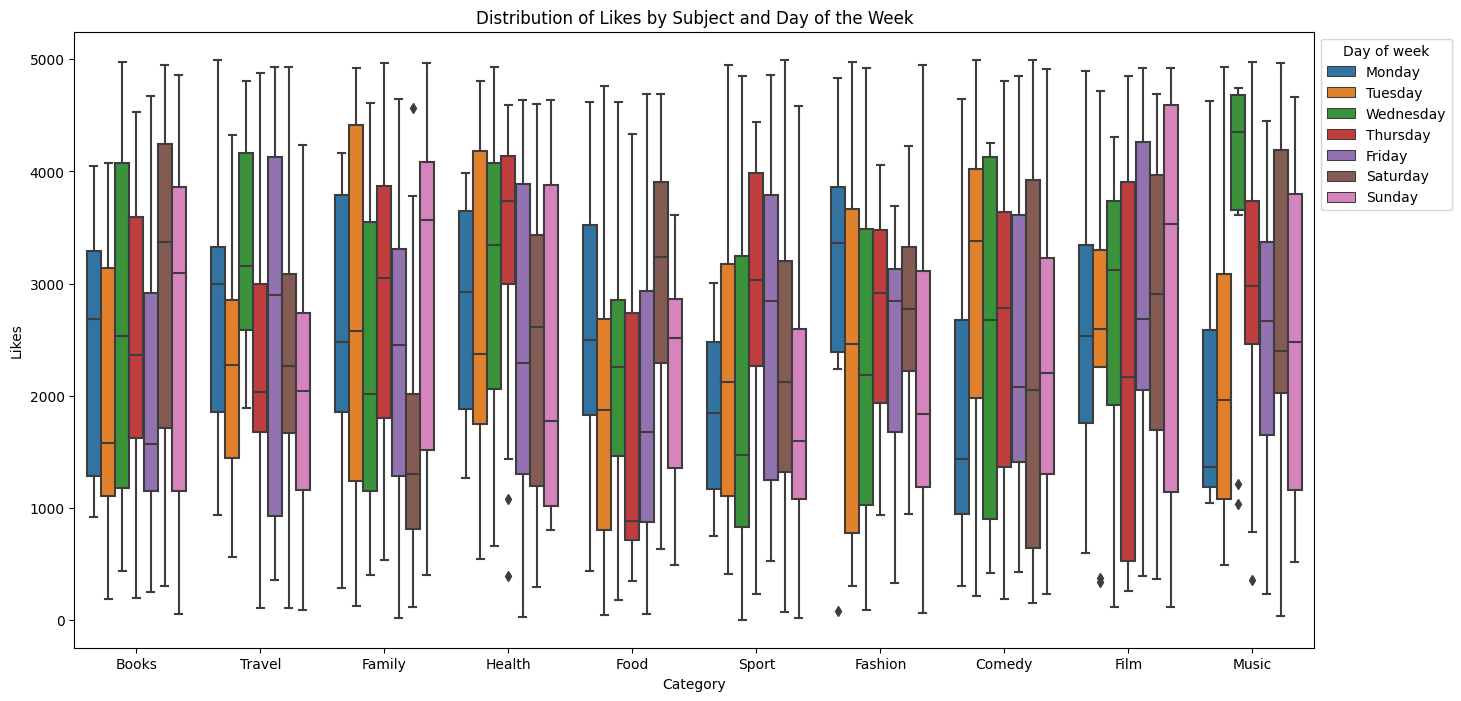

In [25]:
# Define the order of days
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert 'day_of_week' to categorical with the specified order
df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=days_order, ordered=True)

# Boxplot for each subject with different boxes for each day of the week
plt.figure(figsize=(16, 8))
sns.boxplot(x='Category', y='Likes', hue='day_of_week', data=df)
plt.title('Distribution of Likes by Subject and Day of the Week')
plt.legend(title='Day of week', bbox_to_anchor=(1, 1))
plt.show()


Remember the threshold for 'Low' number of Likes is 1653.  

Books: Lowest median number of Likes on Tuesday and Friday. High variability in the popularity of posts on all days, although the median generally is in the middle of the box or higher, so tending towards the higher end of the distribution. 
Travel: The lowest median number of Likes are well into the 'Medium' threshold. Performance is more consistent throughout the week than for Books, with the exception of Fridays. Wednesdays are good! 
Family: Perform consistently poorly on Fridays.   
Health: Perform consistently well on Thursdays.
Food:
Sport:
Fashion:
Comedy:
Film: High variability on Thurs/Sun, although median scores are good.
Music: Best score on Wednesdays - very short tails.


Statistical analysis: Comparing the mean number of Likes for each category with the overall mean number of Likes for the whole dataset.

In [ ]:
df.Likes.mean()

In [ ]:
groups = df.groupby('Category')
groups.Likes.mean()

The average number of Likes in the Comedy, Fashion, Food, and Sport categories is lower than the overall average.
Food has the lowest average number of Likes, and Film has the highest average.

# Conclusion
Write a conclusion about your process and any key findings.  
This is your opportunity to impress your prospective employer with your critical thinking and problemsolving skills. You may want to discuss the process you followed and share your struggles and how you overcame them. What do you think sets your portfolio project apart from those of other candidates?  
You may even want to offer ideas for improving the design for future business endeavors.  
At this point, you can prepare the project artifacts for uploading into your portfolio. You should include:  
 • An image file of your Graphs and Statistics with the fields and data displayed.  
 • Excerpts from your code explaining the purpose of the code.  
 • Any improvements/changes you would make to the application.  
 
My analysis reveals two issues: low median values and values with high variability. In order to improve the performance of posts, we need to try to raise median values to above the threshold for 'Low' number of Likes, as well as improve the consistency of post performance by shortening the IQR.

## Step 1: Addressing Low Median Values  
* Identify low-performing days: If certain days (e.g., Mondays and Fridays) consistently show low median likes for a specific category, it indicates that those days might not be optimal for posting in that category.  
* Reschedule tweets: Consider scheduling tweets for this category on other days that show higher median values, where tweets tend to perform better.  

## Step 2: Analyzing High Variability (IQR)  
* Deep analysis of tweets: For days with high IQR, perform a deeper analysis to understand why there's such a wide range of performance.  
* Content analysis: Use Natural Language Processing (NLP) techniques to analyze the content of the tweets to identify patterns in successful vs. less successful tweets.